Project – Analyzing the trends of COVID-19 with Python
Problem Statement: Given data about COVID 19 patients, write code to visualize the impact and analyze the trend of rate of infection and recovery as well as make predictions about the number of cases expected a week in future based on the current trends

Guidelines: • Use pandas to accumulate data• Use plotly (visualization library) to create interactive visualizations • Use Facebook prophet library to make time series models • Visualize the prediction by combining these technologies


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [40]:
data = pd.read_csv('covid_19_clean_complete.csv' ,parse_dates =['Date'])

In [41]:
data.rename(columns={'Date':'date','Province/State':'state','Country/Region':'country','Lat':'lat','Long':'long',
                     'Confirmed':'confirmed','Deaths':'deaths','Recovered':'recovered','Active':'active'},inplace=True)

In [42]:
data.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [43]:
#All the records with last date value
top=data[data['date']==data['date'].max()]
top.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa


In [44]:
w = top.groupby('country')['confirmed','active','recovered'].sum().reset_index()

<ipython-input-44-1e4438c052f0>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [45]:
w

,country,confirmed,active,recovered
0,Afghanistan,36263,9796,25198
1,Albania,4880,1991,2745
2,Algeria,27973,7973,18837
3,Andorra,907,52,803
4,Angola,950,667,242
...,...,...,...,...
182,West Bank and Gaza,10621,6791,3752
183,Western Sahara,10,1,8
184,Yemen,1691,375,833
185,Zambia,4552,1597,2815


In [46]:
total_country = w['country'].unique().sum()

Show active Latest active cases

In [47]:
fig=px.choropleth(w,locations='country',locationmode='country names',color='active',hover_name='country',
                 range_color=[1,1500],color_continuous_scale="Peach",title='Active cases Countries')
fig.show()

In [48]:
#Plot Confirmed cases

Confirmed_cases = data.groupby('date')['confirmed'].sum().reset_index()
Confirmed_cases['date'] = pd.to_datetime(Confirmed_cases['date'])
Confirmed_cases.head()


,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [49]:
Confirmed_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       188 non-null    datetime64[ns]
 1   confirmed  188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


Text(0, 0.5, 'Confirmed Cases')

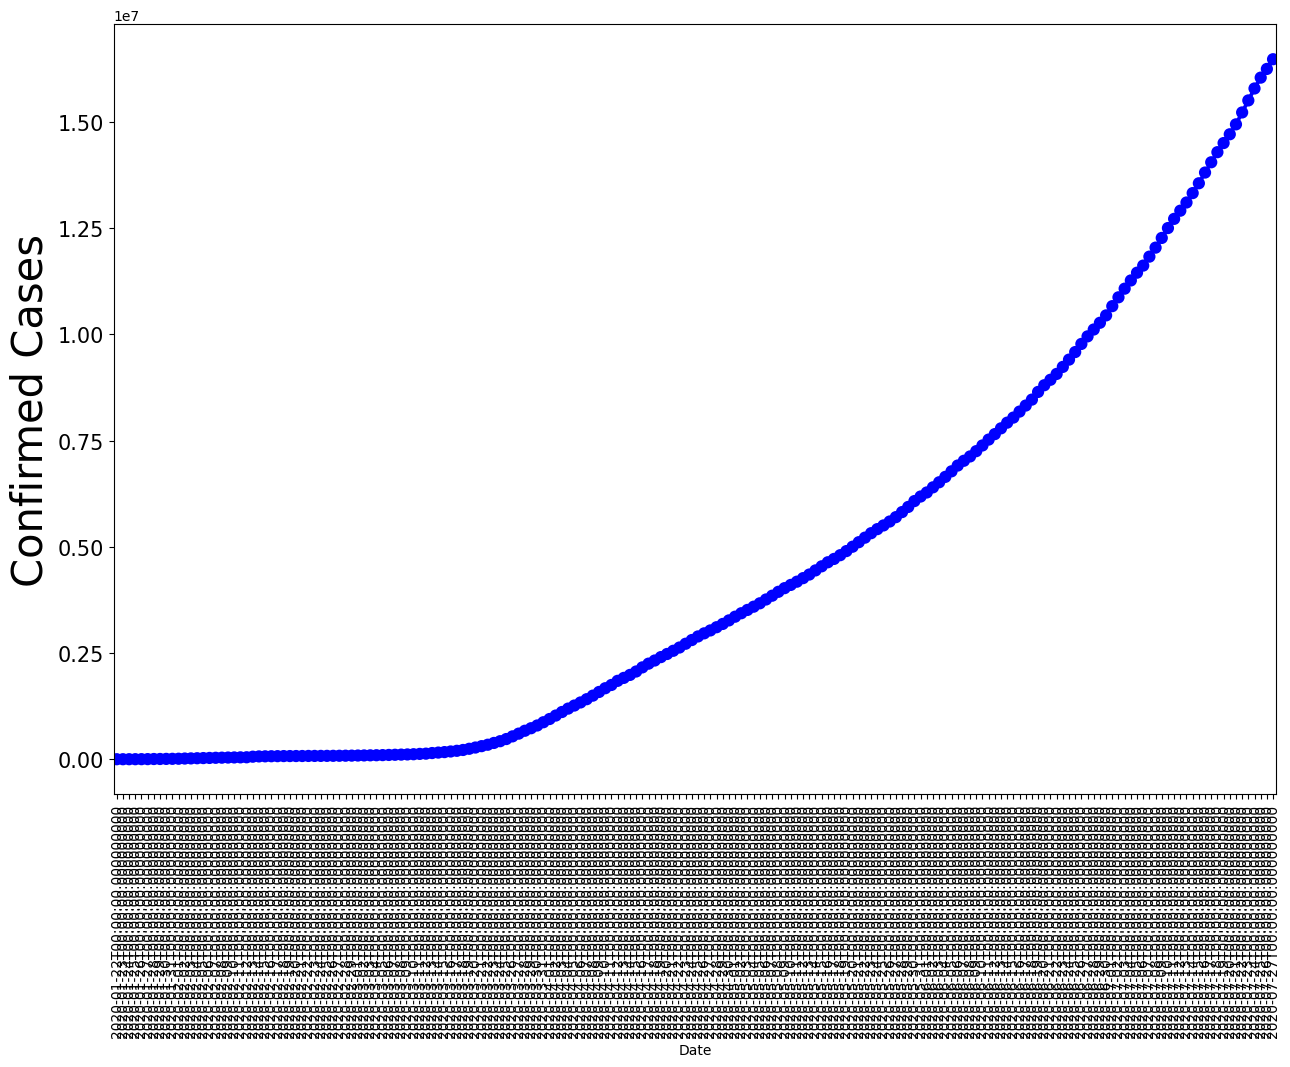

In [50]:
plt.figure(figsize=(15,10))

A = sns.pointplot(x = Confirmed_cases.date,y = Confirmed_cases.confirmed, color = 'b')
A.set(xlabel = 'date', ylabel = 'Confirmed_cases')
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 15)
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Confirmed Cases', fontsize = 30)

In [51]:
#Top 20 countries having most active cases
t_actives=top.groupby(by='country')['active'].sum().sort_values(ascending=False).head(20).reset_index()
t_actives

,country,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


Text(0, 0.5, 'Countryl')

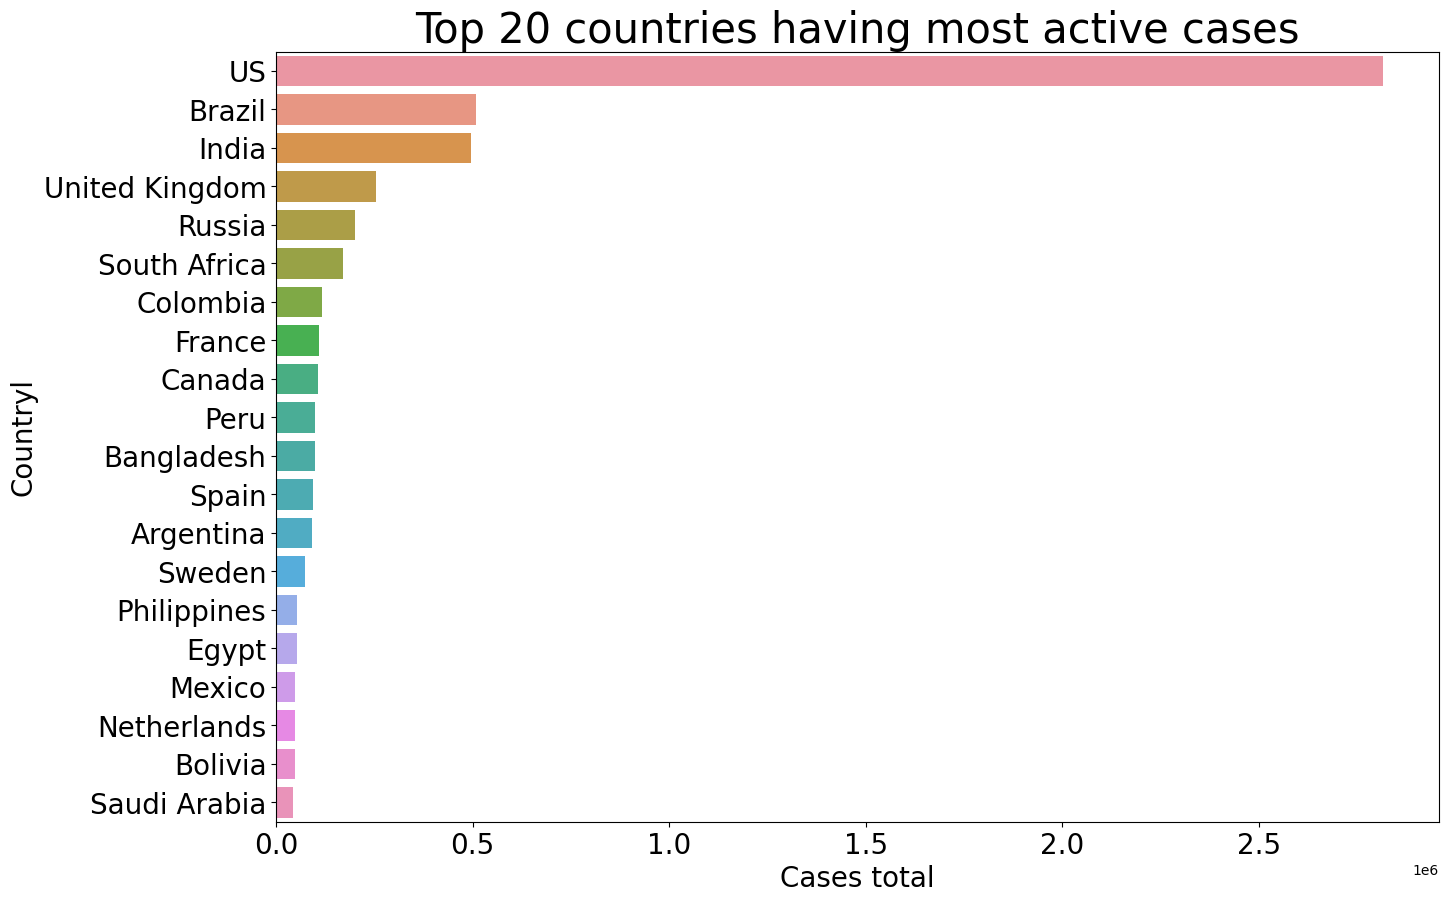

In [52]:
plt.figure(figsize=(15,10))
plt.title('Top 20 countries having most active cases',fontsize=30)
a=sns.barplot(x=t_actives.active,y=t_actives.country)
a.set(xlabel='Cases total',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cases total',fontsize=20)
plt.ylabel('Countryl',fontsize=20)

In [53]:
#Top 20 countries having most death
t_deaths=top.groupby(by='country')['deaths'].sum().sort_values(ascending=False).head(20).reset_index()
t_deaths

,country,deaths
0,US,148011
1,Brazil,87618
2,United Kingdom,45844
3,Mexico,44022
4,Italy,35112
5,India,33408
6,France,30212
7,Spain,28432
8,Peru,18418
9,Iran,15912


Text(0, 0.5, 'Country')

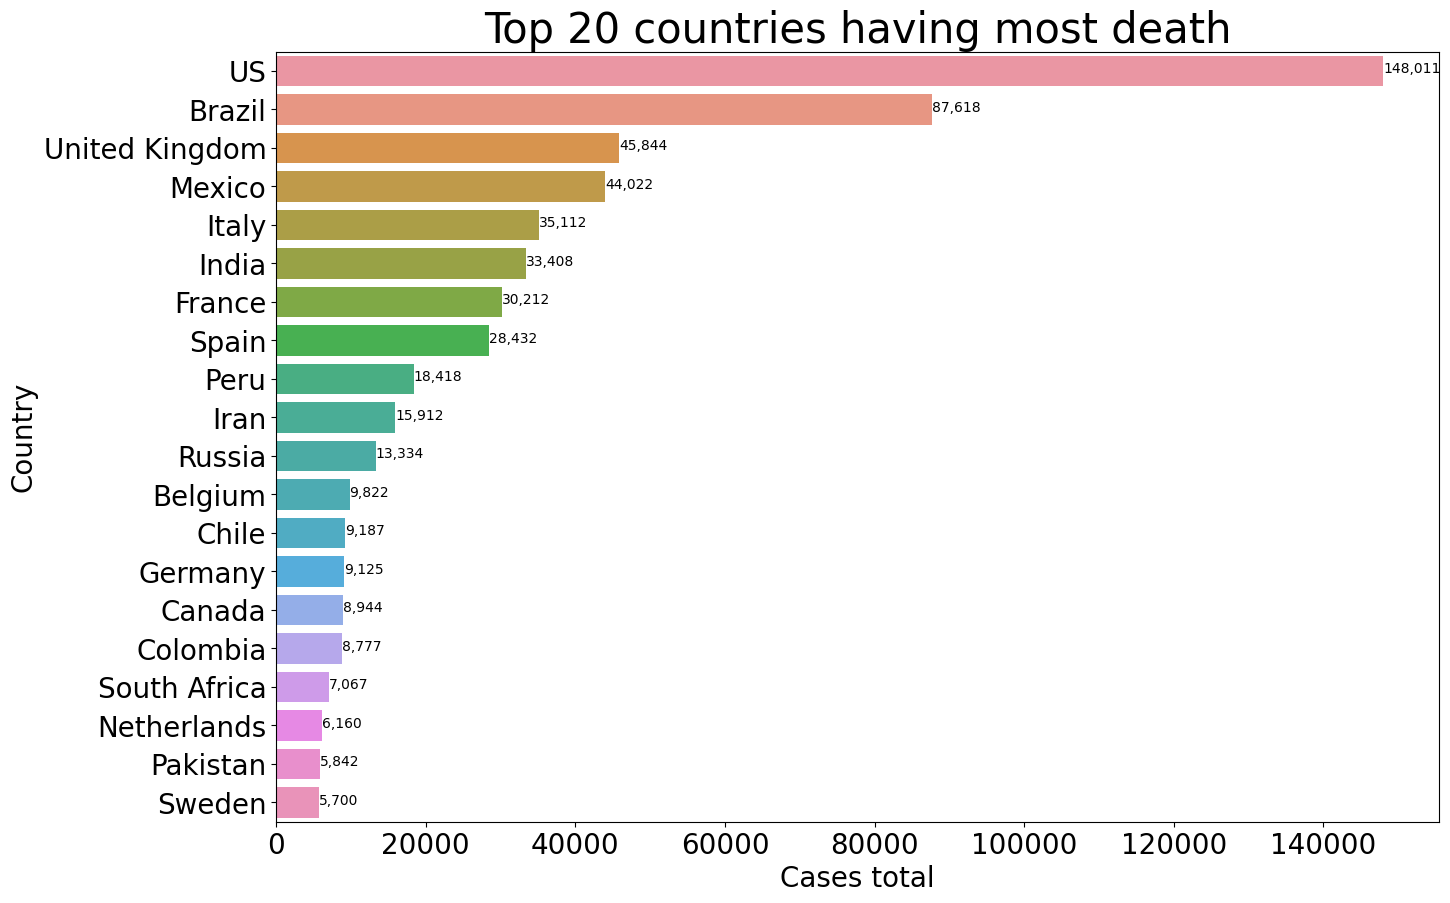

In [54]:
plt.figure(figsize=(15,10))

plt.title('Top 20 countries having most death',fontsize=30)
a=sns.barplot(x=t_deaths.deaths,y=t_deaths.country)
for i,(value,name) in enumerate(zip(t_deaths.deaths,t_deaths.country)):
    a.text(value,i-.05,f'{value:,.0f}',size=10,ha='left',va='center')
a.set(xlabel='Cases total',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cases total',fontsize=20)
plt.ylabel('Country',fontsize=20)

In [55]:
recover=top.groupby(by='country')['recovered'].sum().sort_values(ascending=False).head(20).reset_index()
recover

,country,recovered
0,Brazil,1846641
1,US,1325804
2,India,951166
3,Russia,602249
4,Chile,319954
5,Mexico,303810
6,South Africa,274925
7,Peru,272547
8,Iran,255144
9,Pakistan,241026


Text(0, 0.5, 'Country')

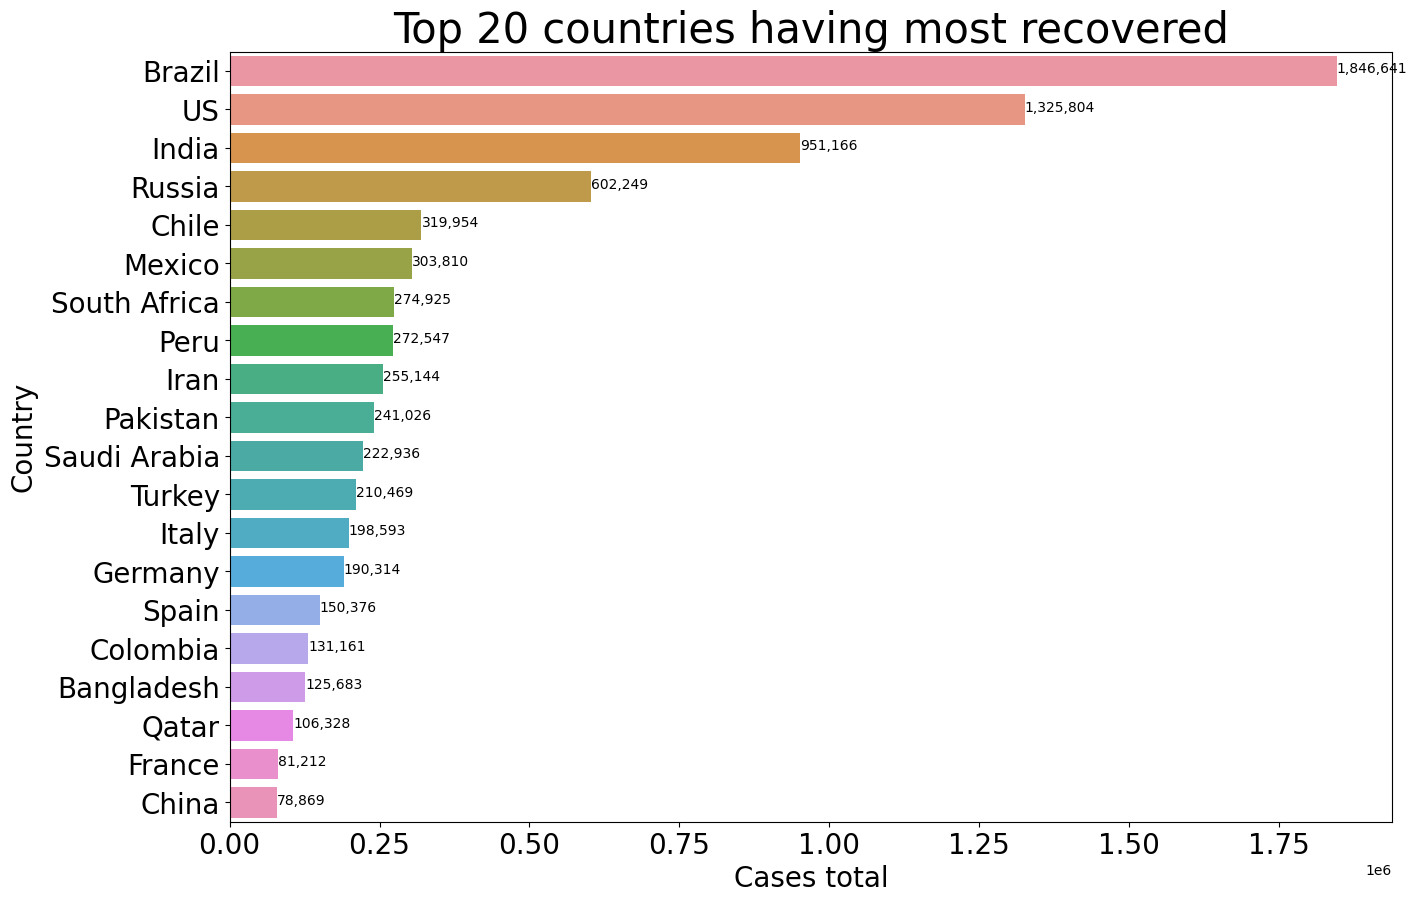

In [56]:
plt.figure(figsize=(15,10))

plt.title('Top 20 countries having most recovered',fontsize=30)
a=sns.barplot(x=recover.recovered,y=recover.country)
for i,(value,name) in enumerate(zip(recover.recovered,recover.country)):
    a.text(value,i-.05,f'{value:,.0f}',size=10,ha='left',va='center')
a.set(xlabel='Cases total',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cases total',fontsize=20)
plt.ylabel('Country',fontsize=20)

In [57]:
Brazil=data[data.country=='Brazil']
Brazil=Brazil.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()
Brazil=Brazil.iloc[9:].reset_index().drop('index',axis=1)

<ipython-input-57-39d28d1afb91>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [58]:
India=data[data.country=='India']
India=India.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()
India=India.iloc[9:].reset_index().drop('index',axis=1)

<ipython-input-58-ee689450a33c>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [59]:
US=data[data.country=='US']
US=US.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()
US=US.iloc[9:].reset_index().drop('index',axis=1)

<ipython-input-59-bfd58030e9ef>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



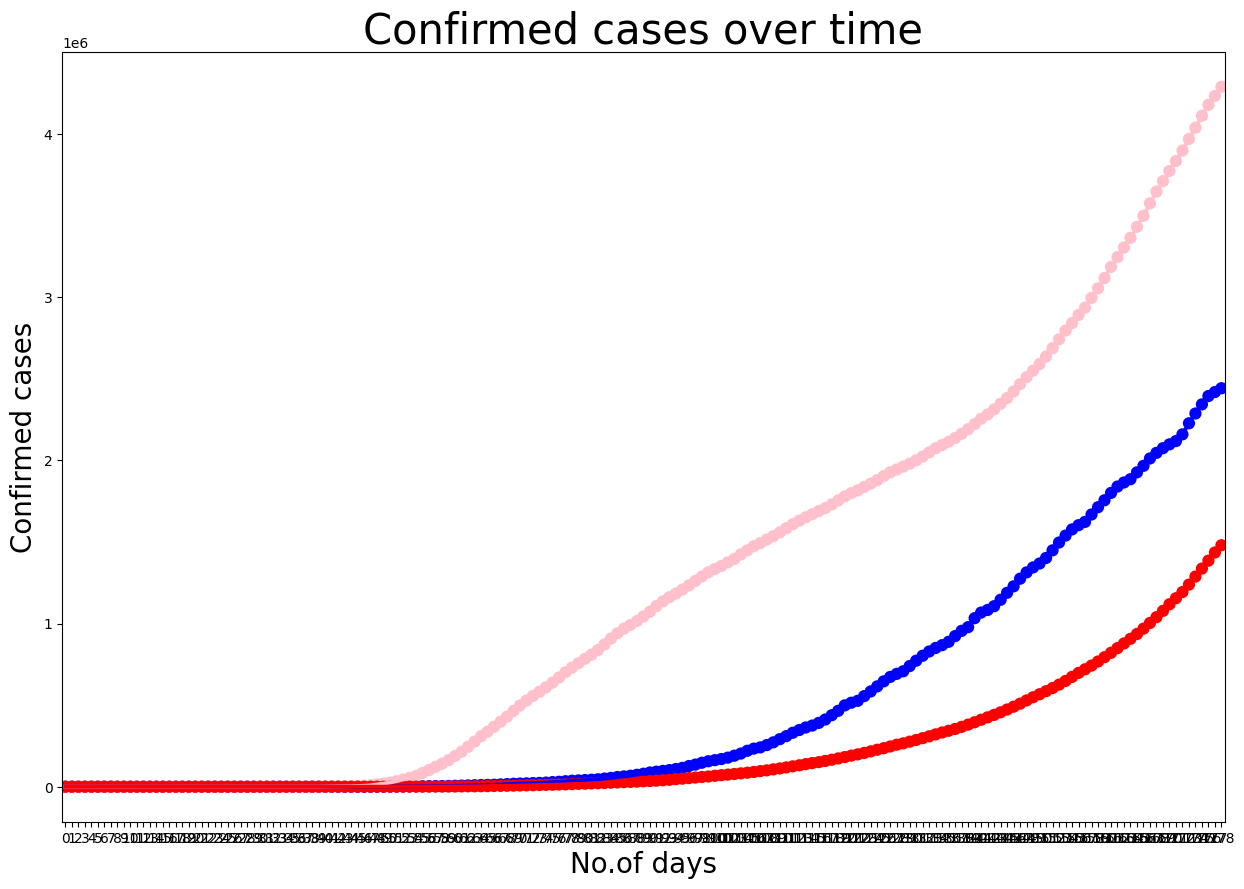

In [60]:
plt.figure(figsize=(15,10))
sns.pointplot(x=Brazil.index,y=Brazil.confirmed,color="Blue")
sns.pointplot(x=US.index,y=US.confirmed,color="Pink")
sns.pointplot(x=India.index,y=India.confirmed,color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Confirmed cases',fontsize=20)
plt.title('Confirmed cases over time',fontsize=30)
plt.show()

In [61]:
#FBProphet

!pip install prophet

In [62]:
from prophet import Prophet

In [63]:
data.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [64]:
data.groupby('date').sum().head()

<ipython-input-64-7a862527e6b4>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,lat,long,confirmed,deaths,recovered,active
date,,,,,,
2020-01-22,5594.20365,6140.869714,555,17,28,510
2020-01-23,5594.20365,6140.869714,654,18,30,606
2020-01-24,5594.20365,6140.869714,941,26,36,879
2020-01-25,5594.20365,6140.869714,1434,42,39,1353
2020-01-26,5594.20365,6140.869714,2118,56,52,2010


In [65]:
total_active=data['active'].sum()
print('Total no.of active COVID 19 CASES',total_active)

Total no.of active COVID 19 CASES 396715350


In [66]:
confirmed = data.groupby('date').sum()['confirmed'].reset_index()
deaths = data.groupby('date').sum()['deaths'].reset_index()
recovered = data.groupby('date').sum()['recovered'].reset_index()
confirmed.tail()

<ipython-input-66-5d9e9d22f887>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-66-5d9e9d22f887>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-66-5d9e9d22f887>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,date,confirmed
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [67]:
recovered.tail()

,date,recovered
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464
187,2020-07-27,9468087


In [68]:
#Forecasting confirmed cases

confirmed.columns = ['ds', 'y']
confirmed['ds']= pd.to_datetime(confirmed['ds'])
confirmed.tail()

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [69]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjne01yta/r6f_wm23.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjne01yta/qcy_j2jh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47973', 'data', 'file=/tmp/tmpjne01yta/r6f_wm23.json', 'init=/tmp/tmpjne01yta/qcy_j2jh.json', 'output', 'file=/tmp/tmpjne01yta/prophet_model5b1b83i7/prophet_model-20231025100707.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:07:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:07:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [70]:
future =m.make_future_dataframe(periods=7,freq='D')
future.tail()

,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


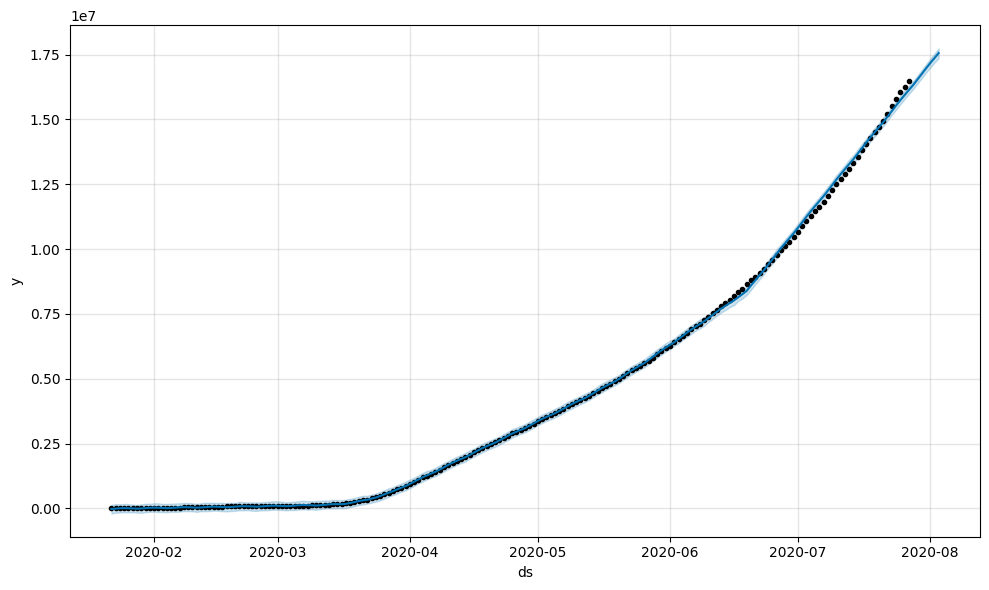

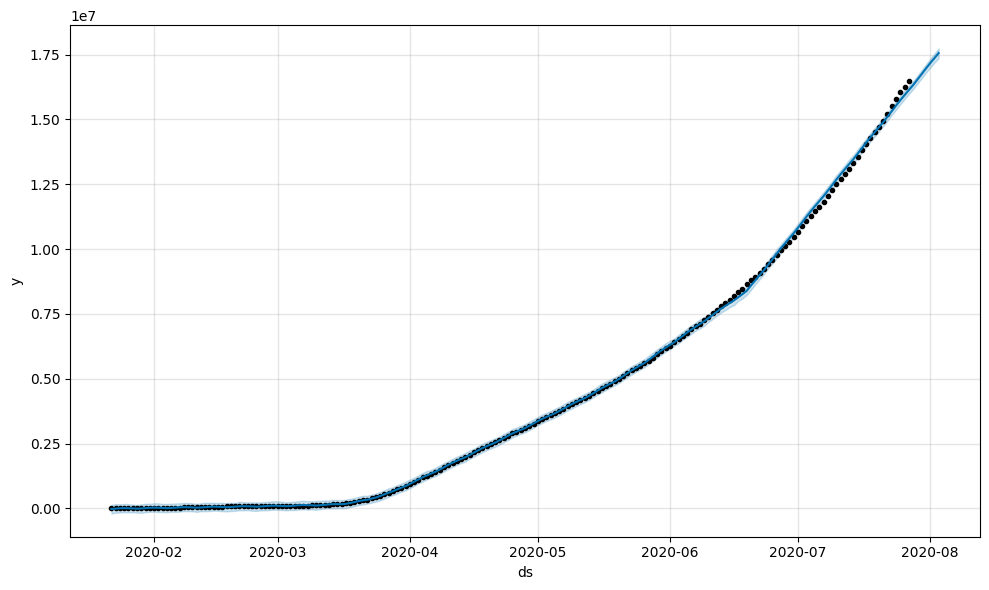

In [73]:
forecast = m.predict(future)
m.plot(forecast)

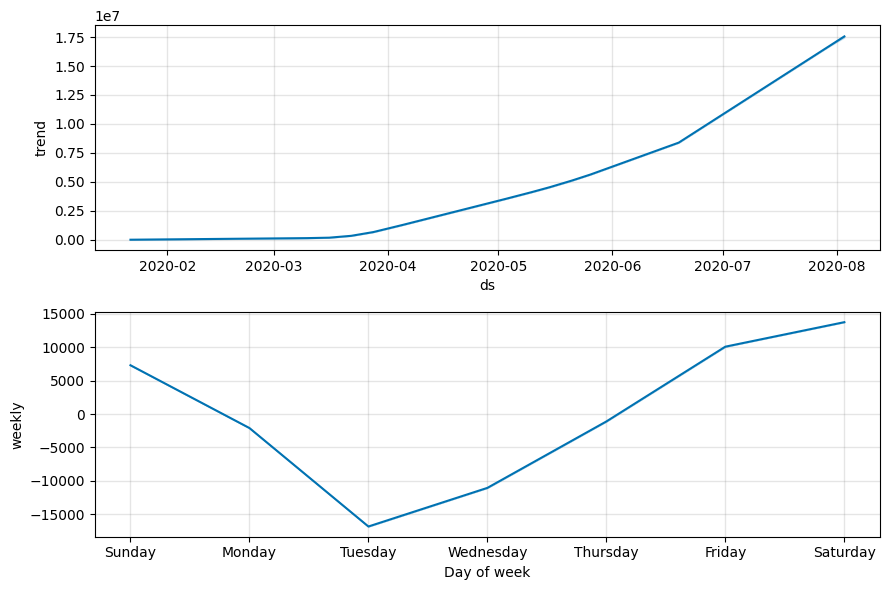

In [72]:
confirmed_forecast_plot = m.plot_components(forecast)